In [2]:
import os 
from bio_compose.verifier import Verifier

v = Verifier()

In [20]:
omex_fp = './fixtures/sbml-core/BIOMD0000000005.omex'
omex_fp2 = './fixtures/sbml-core/Elowitz-Nature-2000-Repressilator.omex'
sbml_fp = './fixtures/sbml-core/BIOMD0000000001_url.xml'
sims = ['copasi', 'tellurium']
start = 0
stop = 100
steps = 1000

In [21]:
sub = v.verify_omex(omex_filepath=omex_fp2, simulators=sims)

In [22]:
_id = sub['job_id']
# _id = 'verification-bio_check-request-cd1f813a-0b40-4a1f-9bcd-376e5fbe348d-ebefde1c-2c5f-4f25-8ee2-92cc442c326a'

_id

'verification-bio_check-request-039bd993-958b-45ab-bdca-12b5f7c53a04-ece6d7b6-adb3-4aca-99d4-ce23debcdf15'

In [23]:
output = v.get_output(_id)

output.keys()

dict_keys(['content'])

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def visualize_observables(self: Verifier, job_id: str, hspace: float = 0.25):
    # grab output from job id
    output = self.get_output(job_id)
    
    # extract the list of simulators from the `output_data` for one observable
    species_data_content = output['content']['results']
    observables = [key for key in species_data_content.keys() if key not in ['comparison_id', 'rmse', 'time', 'Time']]
    first_observable = species_data_content[observables[0]]
    simulators = list(first_observable['output_data'].keys())
    n_simulators = len(simulators)
    
    # create subplots
    fig, axes = plt.subplots(nrows=n_simulators, ncols=1, figsize=(15, 5 * n_simulators))
    
    # if only one simulator, `axes` won't be an array, so make it an array
    if n_simulators == 1:
        axes = [axes]
    
    # iterate over simulators and plot each observable (by iterating over observables)
    for idx, simulator in enumerate(simulators):
        ax = axes[idx]
        for observable in observables:
            value_data = species_data_content[observable]['output_data'][simulator]
            sns.lineplot(data=value_data, ax=ax, label=observable)
        
        sim = simulator.replace(simulator[0], simulator[0].upper())
        ax.set_title(f"{sim} Observable Results")
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")
        
        # hide the x-axis tick labels
        ax.set_xticks([])
    
    # adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=hspace)
    
    return plt.show()



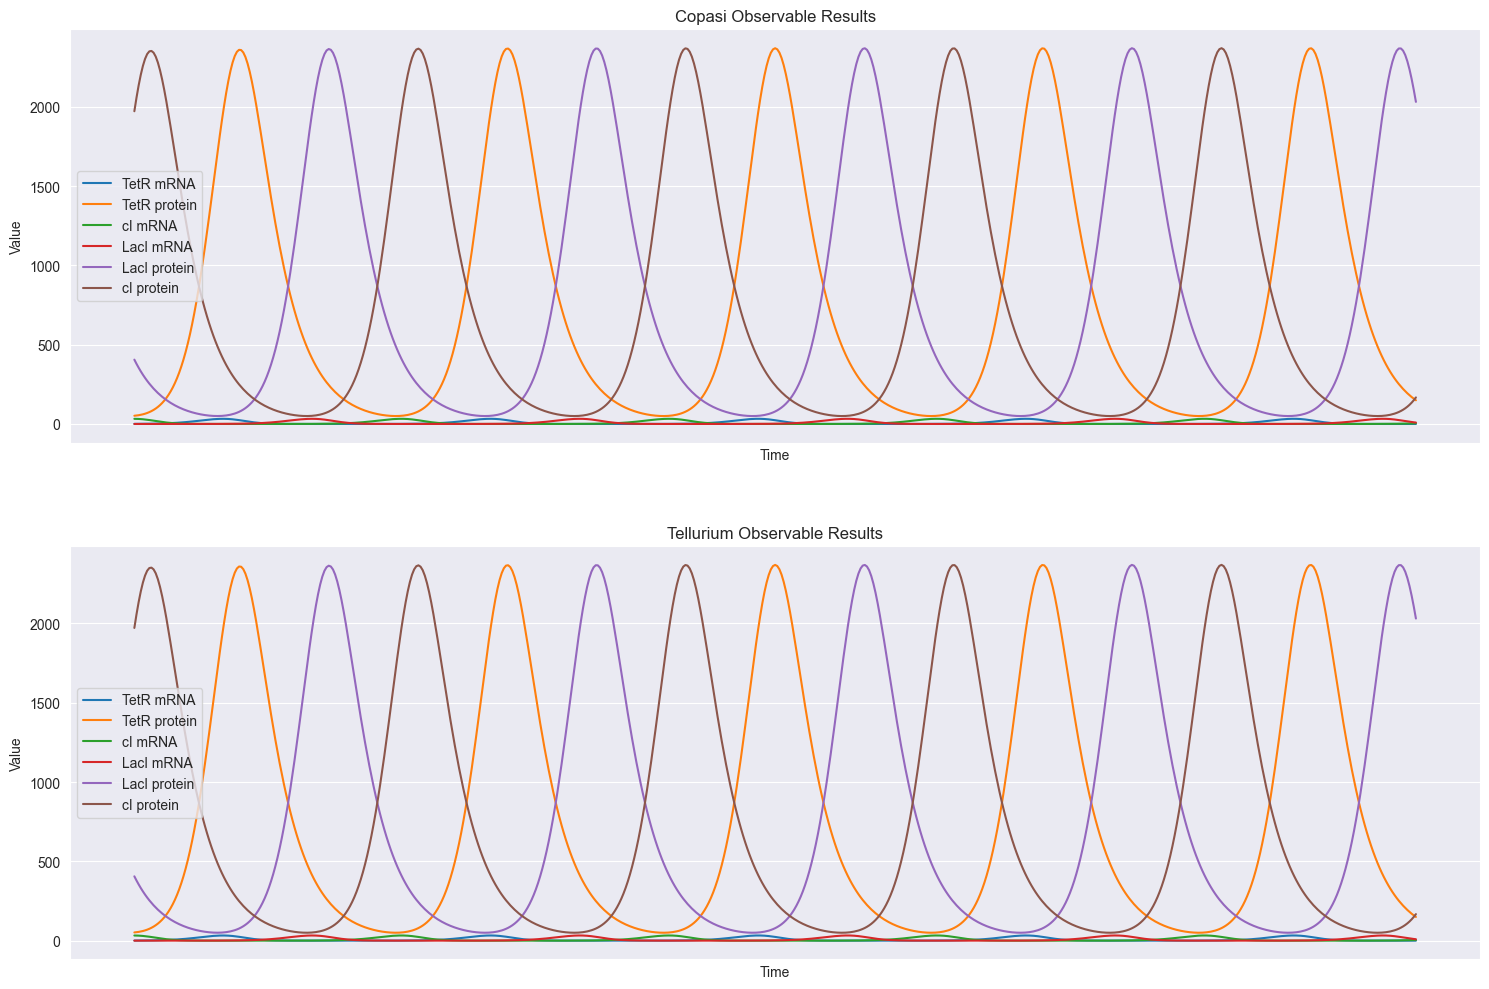

In [85]:
visualize_observables(v, _id)